In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Extracting the file data
df = pd.read_csv(r"C:\Users\tania\Desktop\companies.csv")
df.head()

,sales,Administration,marketing,Profit
0,165349.20,136897.80,16884.92400,192261.83
1,162597.70,151377.59,1725.55230,191792.06
2,153441.51,101145.55,4449.46200,191050.39
3,144372.41,118671.85,21984.47061,182901.99
4,142107.34,91391.77,3866.85520,166187.94


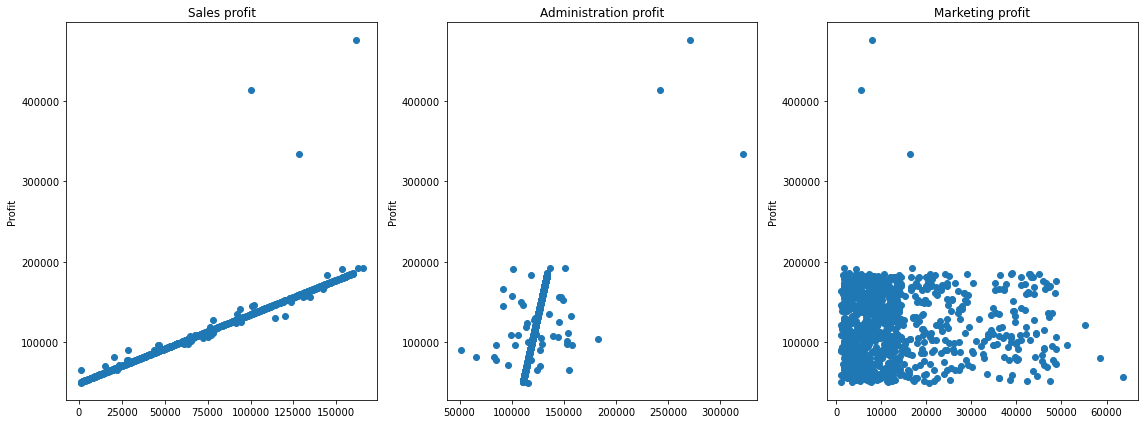

In [25]:
# plotting the datapoints on graph
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['sales'],df['Profit'],'o')
axes[0].set_ylabel("Profit")
axes[0].set_title("Sales profit")

axes[1].plot(df['Administration'],df['Profit'],'o')
axes[1].set_ylabel("Profit")
axes[1].set_title("Administration profit")

axes[2].plot(df['marketing'],df['Profit'],'o')
axes[2].set_ylabel("Profit")
axes[2].set_title("Marketing profit");

plt.tight_layout();

<AxesSubplot:>

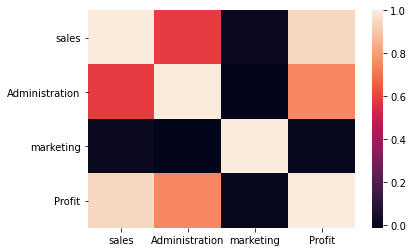

In [26]:
# Building data correlation using the heatmap 
sns.heatmap(df.corr())

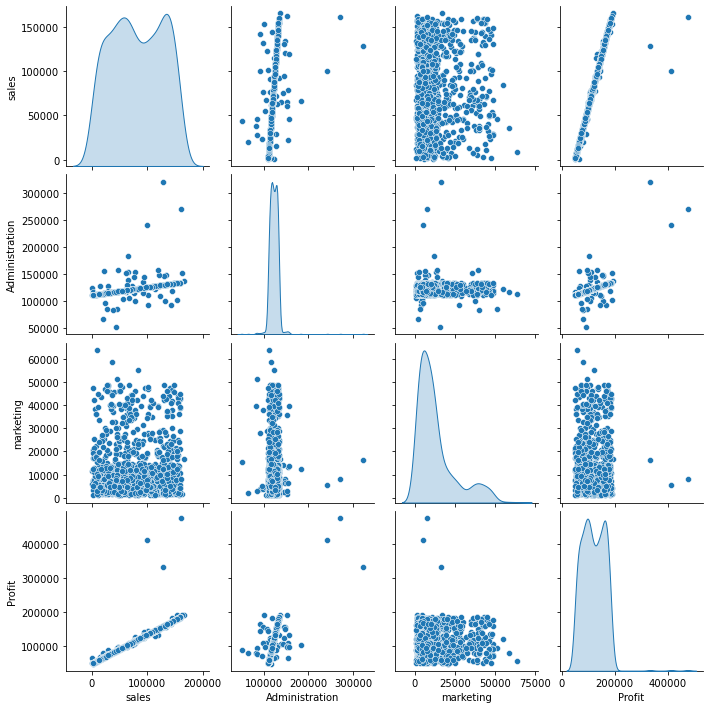

In [27]:
# Relationships between features
sns.pairplot(df,diag_kind='kde')

In [28]:
# New dataset by dropping the profit column
X = df.drop('Profit',axis=1)

y = df['Profit']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
# random set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=102)

In [31]:
X_train

,sales,Administration,marketing
758,27654.0,114541.1643,5428.72770
132,49288.0,117736.1719,11163.56800
839,113736.0,127254.1462,12622.17950
269,140198.0,131162.1749,9282.48060
437,48320.0,117593.2133,5926.84600
...,...,...,...
626,125112.0,128934.2057,6748.59120
242,145420.0,131933.3836,35160.13457
590,6975.0,111487.1954,11842.44200
755,132703.0,130055.2791,5031.26955


In [32]:
y_train

758     72657.47271
132     91139.21223
839    146196.58250
269    168802.84080
437     90312.25819
           ...     
626    155915.00110
242    173263.95030
590     54991.58145
755    162399.92690
256    168686.65710
Name: Profit, Length: 597, dtype: float64

In [33]:
X_test

,sales,Administration,marketing
906,41374.0,116567.3964,4846.92015
802,40281.0,116405.9772,2103.08000
364,122905.0,128608.2658,3180.51010
74,28731.0,114700.2205,7726.85400
486,109403.0,126614.2290,12475.35130
...,...,...,...
426,77031.0,121833.3846,6555.07035
721,150394.0,132667.9666,11264.54100
618,99774.0,125192.1744,34439.85590
568,5885.0,111326.2192,11552.90400


In [34]:
y_test

906     84378.35032
802     83444.60985
364    154029.58010
74      73577.54452
486    142494.93800
           ...     
426    114839.81770
721    177513.19560
618    134268.96640
568     54060.40386
931    159227.08880
Name: Profit, Length: 399, dtype: float64

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
model = LinearRegression()

In [37]:
model.fit(X_train,y_train)

LinearRegression()

In [38]:
# We only pass in test features and the model will predict its own output value
# We can then compare these results to the true y test label value
# performing X-test
test_predictions = model.predict(X_test)

In [39]:
test_predictions

array([ 84516.41884685,  83635.22199283, 154317.26116688,  73640.71590412,
       142579.98949874, 163250.96884892, 148883.18377966,  82107.14687381,
       146152.10761356, 170799.1384217 , 142928.22443503, 165533.64278509,
       160454.07162058,  86865.58557182, 184338.79775821, 159465.39376359,
       161824.60886002, 139763.64499006,  88966.08506869, 182001.0130979 ,
        82585.85886581,  77231.5605695 , 121506.57111728, 132324.68147062,
        59846.95112164, 152391.36976843,  51092.55412912, 140621.96020463,
        95377.30141741, 142376.50591252,  52372.93480377,  88356.12423331,
        88638.59332529, 139366.83722359,  84661.22184629, 171621.2878528 ,
       105231.45864807, 149151.34384148, 169616.30008901,  98408.19965846,
       161809.54762847, 162149.05081774, 185230.24043635, 154883.80522631,
       141462.2881031 , 180689.84029364,  98678.25519722,  57427.42433732,
        82687.14627868,  76894.85092687,  70869.14307011,  52245.72513832,
        59603.17314812,  

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [41]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [42]:
MAE

1833.5012009496063

In [43]:
MSE

105960666.01209705

In [44]:
RMSE

10293.719736426528